In [1]:
#Beschreibung: Dieses Programm sagt den Bitcoin Preis vorher, mithilfe von RNN mit LSTM Zellen

In [4]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [5]:
start = "2019-01-01"
end = "2021-01-01"
test_days = 60

In [7]:
bitcoin = web.DataReader("BTC-USD", data_source="yahoo", start=start, end=end)

In [9]:
bitcoin = bitcoin.filter(["Adj Close"])

In [11]:
bitcoin_data = bitcoin.values

In [16]:
training_len = math.ceil(len(bitcoin)*0.8)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(bitcoin_data)

In [18]:
train_data = scaled_data[:training_len]

In [20]:
train_data.shape

(587, 1)

In [21]:
x_train = []
y_train = []

for i in range(test_days, len(train_data)):
    x_train.append(train_data[i-test_days: i])
    y_train.append(train_data[i])

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(527, 60, 1)

In [32]:
model = Sequential()
model.add(LSTM(32, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(32, return_sequences = False))
model.add(Dense(16))
model.add(Dense(1))
          
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
527/527 [==============================] - 12s 18ms/step - loss: 0.0012
Epoch 2/10
527/527 [==============================] - 10s 18ms/step - loss: 5.6792e-04
Epoch 3/10
527/527 [==============================] - 9s 17ms/step - loss: 4.4258e-04
Epoch 4/10
527/527 [==============================] - 9s 18ms/step - loss: 3.9922e-04
Epoch 5/10
527/527 [==============================] - 9s 17ms/step - loss: 3.2270e-04
Epoch 6/10
527/527 [==============================] - 10s 19ms/step - loss: 3.0670e-04
Epoch 7/10
527/527 [==============================] - 9s 18ms/step - loss: 2.4070e-04
Epoch 8/10
527/527 [==============================] - 9s 17ms/step - loss: 2.3649e-04
Epoch 9/10
527/527 [==============================] - 9s 17ms/step - loss: 2.3238e-04
Epoch 10/10
527/527 [==============================] - 10s 18ms/step - loss: 2.2411e-04


In [34]:
test_data = scaled_data[training_len-test_days: , :]

In [35]:
x_test = []
y_test = bitcoin_data[training_len: , :]

for i in range(test_days, len(test_data)):
    x_test.append(test_data[i-test_days:i])

In [36]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 11ms/step


In [39]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse #root mean squared error

1027.955813891267

In [40]:
train = bitcoin[:training_len]
valid = bitcoin[training_len :]
valid["Predictions"] = predictions

<ipython-input-40-8688b03586d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


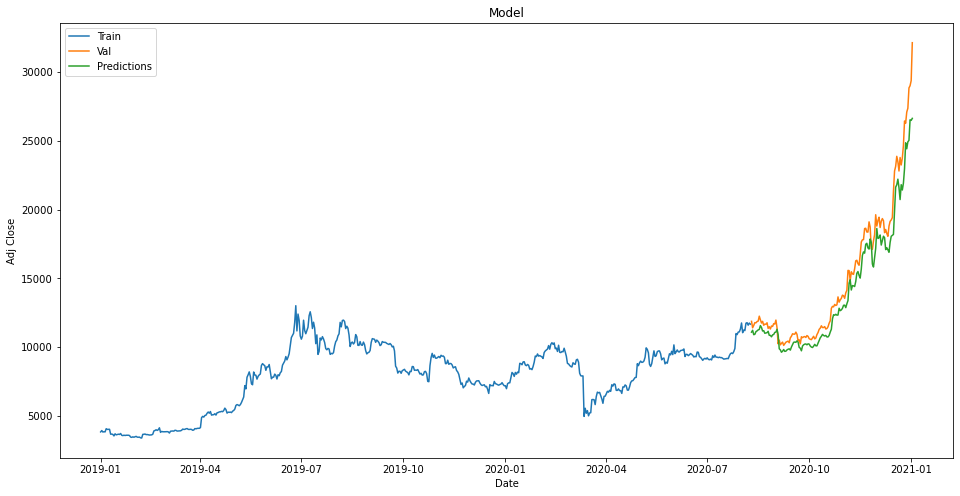

In [43]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.plot(train["Adj Close"])
plt.plot(valid[["Adj Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"]);